# Lighthill's Elongated-Body Theory (EBT)

Lighthill's large-amplitude elongated-body theory utilizes reactive (rather than resistive) theory in order to interpret observational data on animal movements of arbitrary large amplitude. Reactive theory emphasizes reactive forces between a small volume of water and the parts of the animal's surface in contact with it. 

Lighthill's large-amplitude elongated-body theory applies to fish that swim with carangiform motion. Carangiform motion is characterized by fast forward motion, larger wave amplitudes towards the tail in the last half or one-third of the body length than in the anterior, and slower phase of lateral oscillations in this posterior section than that of the anterior. As a result, reactive forces seem to dominate in carangiform motion because the acceleration of water passed by the fish takes place very fast when the posterior section passes and flicks it into motion through the instantaneously acting virtual-mass effect.

The goal of Lighthill's 1971 paper is to extend reactive theory and slender-body theory so that it can be applied to interpret observational data on animal movements of arbitrary large amplitude. In this model, it is hopefully applied to carangiform movements. 

In terms of force and propulsion, Lighthill's elongated-body theory makes use of three principles in a frame of reference in which the water far from the fish is at rest:

1. Water momentum near a section of fish is in a direction perpendicular to the backbone and has magnitude equal to the virtual mass, $m$ per unit length, times the component $w$ of fish velocity in that direction.
2. Thrust can be obtained by considering rate of change of momentum within a volume enclosing the fish whose boundary at each instant includes a flat surface $\Pi$ perpendicular to the caudal fin through its posterior end.
3. In the momentum balance it is necessary to take into account transfer of momentum across $\Pi$ not only by convection but also by the action of the resultant $\frac{1}{2} mw^2$ of the pressures generated by the motions within the plane $\Pi$.

The coordinates used by Lighthill are:

* $y$-axis as the vertical
* $x$-axis and $z$-axis as the horizontal
* Lagrangian coordinate a along the fish body that takes values from 0 (tail) to $l$ (head), the length of the fish

where a left-handed system of axes is used.

The fish swims at a fixed horizontal level ($y=0$), where the constant mean direction of swimming is taken as that of the positive $x$-axis. Additionally, the position coordinates are regarded as $(x(a,t), z(a,t))$ as the point moves due (i) to swimming actions, (ii) to the resulting forward motion of the fish, and (iii) to any lateral recoil motions that may be involuntarily produced.

In addition, we have several notation:

* $(u,w)$ is the horizontal velocity vector (in the Lagrangian fish body frame), where $u$ is the tangential component (forward direction) and $w$ is the perpendicular component (lateral direction) of the fish body
* $(P,Q)$ is the force vector where $P$ is thrust and $Q$ is sideforce; $P$ is forward direction, $Q$ is lateral direction
* $V$ is the magnitude of the $(u,w)$
* $W$ is the component perpendicular to the direction of mean motion

In an elongated body form, the virtual mass is large in respect of the $w$ motions, while the $u$ motions have negligible virtual mass.

The inextensibility of the fish's spinal column requires $ \left(\frac{\partial x}{\partial a}\right)^2 + \left(\frac{\partial z}{\partial a}\right)^2 = 1$. 

The horizontal velocity vector (in a left-handed $x-z$ coordinate system) $\left(\frac{\partial x}{\partial t}, \frac{\partial z}{\partial t} \right)$ has a tangential component (relative to the spinal column) $u= \frac{\partial x}{\partial t} \frac{\partial x}{\partial a} + \frac{\partial z}{\partial t} \frac{\partial z}{\partial a}$ and a perpendicular component $w= \frac{\partial z}{\partial t} \frac{\partial x}{\partial a} - \frac{\partial x}{\partial t} \frac{\partial z}{\partial a}$.

The momentum per unit length of fish is represented by the vector $mw\left(-\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right)$ where the factor in parentheses is a unit vector in the $w$-direction. $m$ is the given cross-section of the fish, which can be approximated by $\frac{1}{4} \pi \rho s^2$, where $\rho$ is the water density and $s$ is the depth of the cross-section. $m$ should be a fixed, known function $m(a)$.

It is difficult to use the rate of change of the momentum in the wake. A better approach would be to study the rate of change of momentum in a part $V$ that excludes the wake. This is done by considering a vertical plane $\Pi$ intersecting the tip of the caudal fin at right angles to the tip of the spinal column. This plane swings around as the fine moves. At each instant, the part $V$ of water whose momentum is considered is that half-space, bounded by the plane $\Pi$, which includes the fish and excludes the wake. The momentum in $V$ can be written as the integral of $mw \left( -\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right)$ from $0$ to $l$ with respect to $a$, and its rate of change can be written as the sum of three terms:

1. rate of change due to convection of momentum out of $V$ across the plane $\Pi$
2. rate of change due to the pressure force acting across $\Pi$
3. minus the reactive force $(P,Q)$ with which the fluid acts on the fish

In general, 
$(P,Q) = \left[mw \left( \frac{\partial z}{\partial t}, -\frac{\partial x}{\partial t} \right) - \frac{1}{2} mw^2 \left(\frac{\partial x}{\partial a}, \frac{\partial z}{\partial a} \right) \right]_{a=0} - \frac{d}{dt} \int_{0}^{l} mw \left(-\frac{\partial z}{\partial a}, \frac{\partial x}{\partial a} \right) da$

The mean thrust can be written as $\overline{P} = \overline{ \left[ mw \left(\frac{\partial z}{\partial t}-\frac{1}{2} w \frac{\partial x}{\partial a} \right) \right]_{a=0}}$


In [104]:
%matplotlib inline

from scipy import spatial
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
from scipy.interpolate import SmoothBivariateSpline
#from scipy.integrate import simps
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sympy import *
import numpy.ma as ma
import csv
from scipy.integrate import simps
from mpl_toolkits.mplot3d import Axes3D

a, t = symbols('a t')
m0, w0, omega, z0 = symbols('m0 w0 omega z0')

## Symbolic Implementation

In the first attempt, we will implement Lighthill's model symbolically. This means that our functions must be analytically solveable; reasonable examples include sinusoidal functions.

We will mainly be working with the SymPy package, which can handle symbolic differentiation and integration.

In [2]:
""" 
Important variables:
P: thrust
Q: sideforce
m: the virtual mass per unit length
w: the perpendicular component of the fish body's velocity, relative to the body
z: the Cartesian coordinate for side motion
x: the Cartesian coordinate for forward motion
a: the Lagrangian coordinate along the fish body, measured from the caudal fin
u: the tangential component of the fish body's velocity
t: time
"""

"""
Pcomponent(m,w,x,z,l) should output the P component of our reactive force.
Similarly, Qcomponent(m,w,x,z,l) should output the Q component.
"""
def Pcomponent(m,w,x,z,l):

    P = m*w*diff(z,t)-(1/2)*m*w**2*diff(x,a) - diff(integrate(
        m*w*(-diff(z,a)),(a,0,l)) ,t)
#     print(P)
#     print(P.subs(a,0))
    return P.subs(a,0)

def Qcomponent(m,w,x,z,l):
    Q = -(m*w*diff(x,t)+(1/2)*m*w**2*diff(z,a)) - diff(integrate(
        m*w*diff(x,a),(a,0,l)),t)
#     print(Q)
#     print(Q.subs(a,0))
    return Q.subs(a,0)

In [255]:
"""
reactiveForce(m,w,x,z,l) should output the force vector based on 
the P component and Q component defined above.
"""
def reactiveForce(m,w,x,z,l):
    reactiveForceVector = np.array([Pcomponent(
        m,w,x,z,l),Qcomponent(m,w,x,z,l)])
    return reactiveForceVector

In [256]:
"""
averageThrust(m,w,x,z,l) should output the average thrust based on Pcomponent.
"""

def averageThrust(m,w,x,z,l):
    Pavg = m*w*diff(z,t)-(1/2)*m*w**2*diff(x,a)
    return Pavg.subs(a,0)

### Tests for Pcomponent, Qcomponent, reactiveForce, and averageThrust below:

In [257]:
Pcomponent(m0,w0*cos(omega*t),0,z0*sin(omega*t),1)

m0*omega*w0*z0*cos(omega*t)**2

In [258]:
Qcomponent(m0,w0*cos(omega*t),0,z0*sin(omega*t),1)

0

In [262]:
reactiveForce(m0,w0*cos(omega*t),0,z0*sin(omega*t),1)

array([m0*omega*w0*z0*cos(omega*t)**2, 0], dtype=object)

In [261]:
# should probably be the same as the instantaneous value of Pcomponent
averageThrust(m0,w0*cos(omega*t),0,z0*sin(omega*t),1)

m0*omega*w0*z0*cos(omega*t)**2

## Numerical Implementation

Once our symbolic model works, we will implement the model numerically. This implementation will be the most useful when we have arbitrary data and functions that cannot be solved analytically. 

We will mainly be working with numPy, which can handle numerical differentiation and integration.

We will attempt to plot some waveforms as well as extract steps such as dx, dz, and da. Our overall goal is to be able to see a simplistic waveform model (best through animation), test for consistency in coordinate axes, and utilize our results for force production.

We will use cubic splining in order to fit functions to kinematics data.

In [138]:
"""Here, we want to try to make an array with certain steps (dx, dz, da) so that I can
later retrieve each point for analysis. We will be forming a simple sinusoidal wave.

Next goal: animate plot, feed in kinematic data, clean up code in terms of 
renaming variables such as step size
"""
class Lighthill:
    
    
    """
    Initializer for the Lighthill class. 
    t: an array of time values at which data was taken.
    x: an array of x values. Ideally, x would range from 0 to 1.
    z: an array of z values. z should also range from 0 to 1.
    s: an array of s values, where s is the depth of the cross-section. Used
          to calculate the virtual mass m.
    rho: the density of the fluid. Used to calculate the virtual mass m.
    
    Arrays should be same number of elements.
    """
    
    """
    The constructor below is using the crude method, where both sets of derivatives are found using
    discrete steps

    def __init__(self, t, x, z, s, rho):
        self.t = t
        self.x = x
        self.z = z
        
        self.body = np.array(list(zip(x,z))) # np array of coordinates (x,z)
        #self.body = np.dstack(x,z) another possible way of writing the line above
        
        self.dt = np.diff(t) # crude discretizing of data
        self.dx = np.diff(x)
        self.dz = np.diff(z)
        self.da = np.sqrt((np.diff(fishy.x))**2+(np.diff(fishy.z))**2)
        
        self.dxda = self.dx/self.da # this is the crude way
        self.dzdt = self.dz/self.dt # W 
        
        self.a = np.concatenate((np.array([0]), np.cumsum(self.da)), axis=0) # reconstructing a values from da
        
        self.m = (1/4)*np.pi*rho*s**2 # the virtual mass
        
        self.w = (self.dz/self.dt)*self.dxda-(self.dx/self.dt)*self.dzda # perpendicular component of horizontal velocity vector
        self.w2 = -(self.dx/self.dt)*(self.dz/self.da) # for testing purposes, since w is coming out to 0s
        
        #self.thrustForce = (self.m*self.w*(self.dz/self.dt)-(1/2)*self.m*(self.w**2)*(self.dx/self.da)
                              -(np.sum(self.m*self.w*(-self.dz)))/self.dt)
        #self.sideForce = (self.m*self.w*(-self.dx/self.dt)-(1/2)*self.m*(self.w**2)*(self.dz/self.da)
                            -(np.sum(self.m*self.w*self.dx))/self.dt)
        #self.forceVector = np.array(list(zip(self.thrustForce,self.sideForce))) # (P, Q)

        self.inextBool = None # inextensibility Boolean
    """

    """
    Below is the constructor using the cubic spline method.
    """
    
    def __init__(self, filename, t, x, z, s, rho, numStep):
        self.t = t
        self.x = x
        self.z = z
        self.s = s
        
        self.body = None
        self.extractBody(filename)
        self.tail = None
        self.extractTail()
        self.underwaterTail = None
        self.underwater()
        #self.tail = np.array(list(zip(x,z))) # np array of coordinates (x,z)
        #self.body = np.dstack(x,z) another possible way of writing the line above
        
        #self.da = np.sqrt((np.diff(self.x))**2+(np.diff(self.z))**2)
        #self.dt = np.concatenate((np.diff(t),np.array([np.diff(t)[-1]]))) # repeat last element
        
        self.a = None
        self.aCoordinates()
        #self.a = np.concatenate((np.array([0]), np.cumsum(self.da)), axis=0) # reconstructing a values from da
        
        self.a_new = None
        self.xa = None
        self.za = None
        self.dxda = None
        self.dzda = None
        self.xt = None
        self.zt = None
        self.dxdt = None
        self.dzdt = None
        self.cubicSplinesinterp(numStep)

        # self.xMap = None
        # self.zMap = None
        # self.heatMap()

        self.w = None
        self.m = (1/4)*np.pi*rho*(s**2)
        self.computeW()

        self.p = None
        self.q = None
        self.computeP()
        self.computeQ()
        # attempt to use cubic splining to find dz/dt and dx/dt
        #self.cs_xt = CubicSpline(self.t, self.x) # x(t)
        #self.dxdt = self.cs_xt(self.t,1)
        #self.cs_zt = CubicSpline(self.t, self.z) # z(t)
        #self.dzdt = self.cs_zt(self.t,1)
        
        #self.m = (1/4)*np.pi*rho*(s**2) # the virtual mass
    
        #self.w = self.dzdt*self.dxda-self.dxdt*self.dzda
        
        # below are the forces. for now we omit the integral terms until I figure out the best method
        #self.thrustForce = (self.m*self.w*self.dzdt-(1/2)*self.m*(self.w**2)*self.dxda
                            #-np.trapz(self.m*self.w*(-self.dzda),self.a)/self.dt) # don't forget dt
        #self.sideForce = (self.m*self.w*(-self.dxdt)-(1/2)*self.m*(self.w**2)*self.dzda
                          #-np.trapz(self.m*self.w*(-self.dxda),self.a))
        #self.forceVector = np.array(list(zip(self.thrustForce,self.sideForce))) # (P, Q)
        
        #self.inextBool = None # inextensibility Boolean
        #self.inextensibilityCheck()
   
    """
    def force(self):
        # to calculate thrust force at a point
        # thrustSumTerm = 
        self.thrustForce = 

        # sideSumTerm = 
        self.sideForce = 

        self.forceVector = 
    """
        
        
    """
    inextensibilityCheck checks the inextensibility of the fish body. It returns True if all of the elements in the
    array return 1 and returns False otherwise. inextensibilityCheck takes in an argument err whose default value is
    0. It can be changed to a float, which allows for +/- tolerance at which the function still returns True.
    """
    #def inextensibilityCheck(self,err=0):
        #inextensibilityArray = self.dxda**2 + self.dzda**2
        #self.inextBool = np.all([x>=(1-err) and x<=(1+err) for x in i for i in inextensibilityArray])


    def extractBody(self, filename):
        midlinedata = np.genfromtxt(filename, delimiter=",", skip_header=1,
                            missing_values=-1000,dtype=float,
                            usemask=True, unpack=True) # Masked array to cover -1000 values

        # pre-allocate array to group coordinates together
        midlinearray = np.ma.empty([len(midlinedata)//2,len(midlinedata[0]),2])

        for i in range(0,len(midlinedata)//2):
            midlinearray[i] = np.ma.dstack((midlinedata[2*i],midlinedata[2*i+1]))

        self.body = midlinearray    


    def extractTail(self):
        midlinearray = self.body
        
        # extract tail points 
        compressedmidline = np.ma.empty([len(midlinearray),2])
        for i in range(0,len(midlinearray)):
            lastindex = np.ma.count(midlinearray[i])//2-1
            compressedmidline[i] = midlinearray[i][lastindex]

        # transpose midline data so that the array is in the form [[xarray] [yarray]]
        transposedmidline = np.transpose(compressedmidline)
        
        self.tail = transposedmidline

    
    def underwater(self):
        tailarray = self.tail
        tailx = tailarray[0]
        tailz = tailarray[1]
        self.underwaterTail = np.ma.array([tailx[tailz<0],tailz[tailz<0]], dtype=float)


    def aCoordinates(self):
        
        daArray = np.ma.empty([len(self.body),len(self.body[0])-1])
        for i in range(0,len(self.body)):
            # x and y coordinates for a given time
            currentx = np.transpose(self.body[i])[0]
            currenty = np.transpose(self.body[i])[1]
            daArray[i] = ma.sqrt((np.diff(currentx))**2+(np.diff(currenty))**2)
    
        aArray = np.ma.empty([len(self.body),len(self.body[0])])
        for i in range(0, len(daArray)):
            aArray[i] = np.ma.concatenate((np.array([0]), np.cumsum(daArray[i])), axis=0)
        self.a = aArray
    

    def cubicSplinesinterp(self, numStep):
        xaArray = np.ma.empty([len(self.body),numStep])
        zaArray = np.ma.empty([len(self.body),numStep])
        dxdaArray = np.ma.empty([len(self.body),numStep])
        dzdaArray = np.ma.empty([len(self.body),numStep])

        xtArray = np.ma.empty([len(self.body),len(self.body)])
        ztArray = np.ma.empty([len(self.body),len(self.body)])
        dxdtArray = np.ma.empty([len(self.body),len(self.body)])
        dzdtArray = np.ma.empty([len(self.body),len(self.body)])

        anewArray = np.ma.empty([len(self.body),numStep])
        # really inefficient way, but first for loop is for a derivatives and second is for t derivatives
        for i in range(len(self.body)):
            colx = np.transpose(self.body[i])[0]
            colz = np.transpose(self.body[i])[1]
            currenta = self.a[i]
            last = np.ma.count(currenta)
            anew = np.linspace(currenta[0],currenta[last-1],num=numStep,endpoint=True) # all splined data will have 25 points
            xaspline = InterpolatedUnivariateSpline(currenta[:last],colx[:last])
            dxda = xaspline.derivative()
            zaspline = InterpolatedUnivariateSpline(currenta[:last],colz[:last])
            dzda = zaspline.derivative()

            anewArray[i] = anew
            xaArray[i] = xaspline(anew)
            zaArray[i] = zaspline(anew)
            dxdaArray[i] = dxda(anew)
            dzdaArray[i] = dzda(anew)

        for i in range(len(self.body)):
            colx = np.transpose(self.body[i])[0]
            colz = np.transpose(self.body[i])[1]
            currenta = self.a[i]
            last = np.ma.count(currenta)
            anew = np.linspace(currenta[0],currenta[last-1],num=len(self.t),endpoint=True)
            xaspline = InterpolatedUnivariateSpline(currenta[:last],colx[:last])
            zaspline = InterpolatedUnivariateSpline(currenta[:last],colz[:last])

            xtArray[i] = xaspline(anew)
            ztArray[i] = zaspline(anew)
        
        self.anew = anewArray
        self.xa = xaArray
        self.za = zaArray
        self.dxda = dxdaArray
        self.dzda = dzdaArray

        self.xt = xtArray
        self.zt = ztArray

        for i in range(len(self.body)):
            rowx = np.transpose(xtArray)[i]
            rowz = np.transpose(ztArray)[i]
            t = self.t

            xtspline = InterpolatedUnivariateSpline(t,np.transpose(self.xt)[i])
            dxdt = xtspline.derivative()
            ztspline = InterpolatedUnivariateSpline(t,np.transpose(self.zt)[i])
            dzdt = ztspline.derivative()

            dxdtArray[i] = dxdt(t)
            dzdtArray[i] = dzdt(t)

            #plt.plot(currenta[:last],currentx[:last],'o',anew,xaspline(anew),'--',anew,dxda(anew),'-')
            #plt.plot(anew,dxda(anew),'-')
            #plt.plot(anew,dzda(anew),'--')
#             plt.legend(['data','univariate','dev'], loc='best')
#             plt.show()
        print('xaArray:',xaArray)
        print('zaArray:',zaArray)
        print('dxdaArray:',dxdaArray)
        print('dzdaArray:',dzdaArray)
        print('xtArray:',xtArray)
        print('ztArray:',ztArray)
        print('dxdtArray:',dxdtArray)
        print('dzdtArray:',dzdtArray)

        self.dxdt = dxdtArray
        self.dzdt = dzdtArray


    def bivariateSplines(self):
        xzaArray = np.ma.empty([len(self.body),numStep])
        xztArray = np.ma.empty([len(self.body),numStep])
        tSpline = SmoothBivariateSpline(self.xt[0],self.zt[0],self.t)
        print

    def computeW(self):
        w = self.dzdt*self.dxda-self.dxdt*self.dzda
        self.w = w
    
    def computeP(self):
        wTail = np.transpose(self.w)[-1]
        dzdtTail = np.transpose(self.dzdt)[-1]
        dxdaTail = np.transpose(self.dxda)[-1]
        tailTerm = self.m[-1]*wTail*dzdtTail-(1/2)*self.m[-1]*wTail**2*dxdaTail
        print("Tail term:", tailTerm)
        integrand = self.m*self.w*(-self.dzda)
        integral = simps(integrand, self.anew)
        integralspline = InterpolatedUnivariateSpline(self.t,integral)
        integralTerm = integralspline.derivative() 
        print("Integral Term", integralTerm(self.t))
        self.p = tailTerm - integralTerm(self.t)

    def computeQ(self):
        wTail = np.transpose(self.w)[-1]
        dxdtTail = np.transpose(self.dxdt)[-1]
        dzdaTail = np.transpose(self.dzda)[-1]
        tailTerm = self.m[-1]*wTail*(-dxdtTail)-(1/2)*self.m[-1]*wTail**2*dzdaTail
        print("Tail term:", tailTerm)
        integrand = self.m*self.w*(self.dxda)
        integral = simps(integrand, self.anew)
        integralspline = InterpolatedUnivariateSpline(self.t,integral)
        integralTerm = integralspline.derivative() 
        print("Integral Term", integralTerm(self.t))
        self.q = tailTerm - integralTerm(self.t)
        
    # def heatMap(self):
    #     xMap = np.ma.empty([len(self.body),len(self.anew[0])])
    #     zMap = np.ma.empty([len(self.body),len(self.anew[0])])

    #     for it in range(len(self.body)):
    #         for ia in range(len(self.anew[0])):
    #             currentaArray = self.anew[it]
    #             currentaValue = currentaArray[ia]
    #             xMap[it,ia] = self.xa[it,ia]
    #             zMap[it,ia] = self.za[it,ia]

    #     self.xMap = xMap
    #     self.zMap = zMap

    """
    waveform generates plots for testing and verifying calculations
    need to rewrite this to comply with cubic spline data
    """
    def waveform(self):
        plt.subplot(111)
        
        #zvsx = plt.plot(self.x,self.z, label='z vs x')
        #dzdxvsx = plt.plot(self.x[1:],(self.dz/self.dx),label='dz/dx vs x')
        #avsx = plt.plot(self.x,self.a, label='a vs x')
        #wvsx = plt.plot(self.x[1:],self.w, label='w vs x')
        PvsQ = plt.plot(self.thrustForce,self.sideForce)
#         xvsa = plt.plot(self.aCoordinates(),self.)
#         yvsa = 
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    #def computeW(self):
        

        
    """print functions galore"""
    def test(self):
        print('t is: ', self.t)
        print('x is: ', self.x)
        print('z is: ', self.z)
        print('a is: ', self.a)
        print('w is: ', self.w)
        print('m is: ', self.m)
        print('dzdt is: ', self.dzdt)
        print('dxdt is: ', self.dxdt)
        print('dxda is: ', self.dxda)
        print('dzda is: ', self.dzda)
        #print('term 2 of w is: ', self.w2)
        print('The force vector is: ', self.forceVector)
        #print('Is the body inextensible? ', self.inextBool)
        print('The timesteps are: ', self.dt)
#         print('The x-steps are: ', self.dx)
#         print('The z-steps are: ', self.dz)
#         print('The a-steps are: ', self.da)

### Tests

We will attempt to plot some waveforms as well as extract steps such as dx, dz, and da. Our overall goal is to be able to see a simplistic waveform model (best through animation), test for consistency in coordinate axes, and utilize our results for force production.

In [50]:
tTemp = np.linspace(0,1,10,endpoint=True,dtype=float)
xTemp = np.linspace(0,1,10,endpoint=True,dtype=float) 
zTemp = np.sin(xTemp) # approx 1 or 0.5 
sTemp = np.array([0.094, 0.087, 0.079, 0.083, 0.087,
                 0.088, 0.083, 0.084, 0.092, 0.093]) # took s values from 1971 Lighthill

fishy = Lighthill(tTemp, xTemp, zTemp, sTemp, 997) #density of water 997 kg/m^3
fishy.inextensibilityCheck(1e-3)
fishy.test()

t is:  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
x is:  [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
z is:  [0.         0.11088263 0.22039774 0.3271947  0.42995636 0.52741539
 0.6183698  0.70169788 0.77637192 0.84147098]
a is:  [0.         0.15697336 0.31298374 0.46709821 0.6184443  0.76624126
 0.90983229 1.04871802 1.18259069 1.31136789]
w is:  [ 9.41802667e-05 -2.89674057e-05  3.86284082e-06 -5.16173725e-06
 -1.92489583e-06 -5.63544201e-06  8.24647013e-06 -3.95963611e-05
  1.52097978e-04 -5.67785474e-04]
m is:  [6.91895884 5.92684466 4.88696493 5.39437612 5.92684466 6.06387701
 5.39437612 5.52514413 6.62766722 6.77252999]
dzdt is:  [1.00002648 0.99382534 0.97541124 0.94495555 0.90284931 0.84960582
 0.78589028 0.71246029 0.63032576 0.54011062]
dxdt is:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
dxda is:  [0.70712991 0.70928425 0.71585904 0.72683742 0.7422625

### Cubic splining tests using data from above

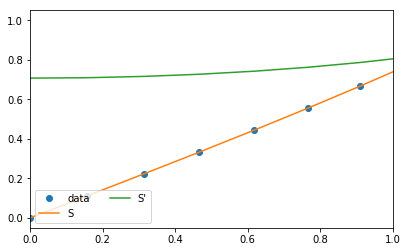

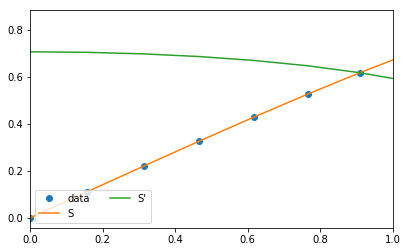

[0.70705445 0.70493363 0.69825309 0.68683421 0.67015318 0.64751149
 0.61794453 0.5803651  0.53315231 0.47595643]
[0.70712991 0.70928425 0.71585904 0.72683742 0.74226258 0.76212502
 0.78630922 0.81453733 0.84607745 0.88016903]


In [54]:
#trying to use x(a)
cs_x = CubicSpline(fishy.a, fishy.x)
#xs = np.arange(0, 1,0.1) # I don't think this line is necessary; should use a instead of xs ?
plt.figure(figsize=(6.5,4))
plt.plot(fishy.a,fishy.x,'o',label='data')
plt.plot(fishy.a, cs_x(fishy.a), label="S")
plt.plot(fishy.a, cs_x(fishy.a,1), label="S'") #first derivative
plt.xlim(0,1)
plt.legend(loc='lower left', ncol=2)
plt.show()

# z(a)
cs_z = CubicSpline(fishy.a, fishy.z)
plt.figure(figsize=(6.5,4))
plt.plot(fishy.a,fishy.z,'o',label='data')
plt.plot(fishy.a, cs_z(fishy.a), label="S")
plt.plot(fishy.a, cs_z(fishy.a,1), label="S'") #first derivative
plt.xlim(0,1)
plt.legend(loc='lower left', ncol=2)
plt.show()

print(cs_z(fishy.a,1))
#print(cs_z(np.arange(0,1,0.1)))
#print(fishy.dz/fishy.da)

print(cs_x(fishy.a,1))
#print(fishy.dx/fishy.da)

### Tests using Bainbridge data

Below are the tests using the Bainbridge data mentioned in Lighthill's 1971 paper. The data is already broken up into derivatives. According to the paper:
* $w = V \sin{\alpha}$
* $W = {\partial z}/{\partial t} = V \sin{\alpha + \theta}$
* ${\partial x}/{\partial a} = \cos{\theta}$


In [38]:
tBainbridge = np.array([0.04, 0.08, 0.12, 0.16, 0.20, 0.24,
                       0.28, 0.32, 0.36, 0.40])
VBainbridge = np.array([0.50, 0.60, 0.74, 0.68, 0.52, 0.62,
                       0.87, 0.67, 0.52, 0.48]) 
sBainbridge = np.array([0.094, 0.087, 0.079, 0.083, 0.087,
                 0.088, 0.083, 0.084, 0.092, 0.093])
mBainbridge = (1/4)*np.pi*997*(sBainbridge**2) 
wBainbridge = np.array([0.03, 0.03, 0.06, 0.19, 0.09, -0.09,
                       -0.24, -0.12, -0.05, 0.00])
WBainbridge = np.array([0.15, 0.42, 0.64, 0.50, 0.12, -0.36,
                       -0.75, -0.48, -0.22, -0.02]) # dz/dt
dxdaBainbridge = np.array([0.97, 0.74, 0.57, 0.85, 1.00, 
                          0.88, 0.72, 0.81, 0.95, 1.00])
alphathetaBrindge = np.array([17,45,60,48,13,-36,-60,-46,
                              -25,-3])
alphaBainbridge = np.array([3,3,5,16,10,-8,-16,-10,-6,0])
thetaBainbridge = alphathetaBrindge - alphaBainbridge

In [39]:
print(mBainbridge) # these values match his values in the table

[6.91895884 5.92684466 4.88696493 5.39437612 5.92684466 6.06387701
 5.39437612 5.52514413 6.62766722 6.77252999]


To find $w= \frac{\partial z}{\partial t} \frac{\partial x}{\partial a} - \frac{\partial x}{\partial t} \frac{\partial z}{\partial a}$, we broke it into these parts given Bainbridge's data:

* $\frac{\partial z}{\partial t} = W$
* $\frac{\partial x}{\partial a}$
* $\frac{\partial x}{\partial t} = V \cos{\alpha+\theta}$
* $\frac{\partial z}{\partial a} = \sin{\theta}$

and we have matching values as in the table.

In [75]:
# trying to compute w

print((WBainbridge*dxdaBainbridge)
      -(VBainbridge*np.cos(np.deg2rad(alphathetaBrindge)))*
      (np.sin(np.deg2rad(thetaBainbridge))))
# values actually match! 

[ 0.02982447  0.02691193  0.06171374  0.18388206  0.09348281 -0.08131751
 -0.23782361 -0.11523234 -0.05556622  0.00508683]


We will now try to simply multiply values together as Lighthill did. All of the values match Lighthill's calculations.

In [13]:
mwW = mBainbridge*wBainbridge*WBainbridge 
mw2 = (1/2)*mBainbridge*(wBainbridge**2)*dxdaBainbridge
mw3 = mwW-mw2

print(mwW) 
print(mw2)
print(mw3) # all these values match Lighthill's


print(WBainbridge*dxdaBainbridge)

[ 0.03113531  0.07467824  0.18765945  0.51246573  0.06400992  0.19646962
  0.9709877   0.3182483   0.07290434 -0.        ]
[0.00302013 0.00197364 0.00501403 0.08276322 0.02400372 0.02161166
 0.11185778 0.03222264 0.00787035 0.        ]
[ 0.02811519  0.0727046   0.18264543  0.42970252  0.0400062   0.17485796
  0.85912992  0.28602566  0.06503398 -0.        ]
[ 0.1455  0.3108  0.3648  0.425   0.12   -0.3168 -0.54   -0.3888 -0.209
 -0.02  ]


### Tests using midline data

From the archer fish midline CSV, we extracted the tail kinematics data from each set of time. We also attempted to use this real data to test the model.

In [49]:
"""
An attempt to import csv midline data and compute kinematics from those values
"""

midlinefile = "Mendelson_midlinedata.csv"
midlinedata = np.genfromtxt(midlinefile, delimiter=",", skip_header=1,
                            missing_values=-1000,dtype=float,
                            usemask=True, unpack=True) # Masked array to cover -1000 values

# pre-allocate array to group coordinates together
midlinearray = np.ma.empty([len(midlinedata)//2,len(midlinedata[0]),2])

for i in range(0,len(midlinedata)//2):
    midlinearray[i] = np.ma.dstack((midlinedata[2*i],midlinedata[2*i+1]))

# extract tail points 
compressedmidline = np.ma.empty([len(midlinearray),2])
for i in range(0,len(midlinearray)):
    lastindex = np.ma.count(midlinearray[i])//2-1
    compressedmidline[i] = midlinearray[i][lastindex]
    
# transpose midline data so that the array is in the form [[xarray] [yarray]]
transposedmidline = np.transpose(compressedmidline)

# making t array using given dt. Inefficient/redudant since it will be broken down into dt again... need to change something
midlinetime = np.concatenate((np.array([0]),np.cumsum(np.full(len(compressedmidline)-1,0.00111))))

# cross-section, guesstimate
archers = np.full(len(compressedmidline),0.08)

In [139]:
archerfish = Lighthill("Mendelson_midlinedata.csv", midlinetime, transposedmidline[0],transposedmidline[1],archers, 997, 180)
#archerfish.inextensibilityCheck(5)
#np.transpose(archerfish.extractBody("Mendelson_midlinedata.csv")[0])

#archerfish.extractTail()
#archerfish.underwater()
#archerfish.test()
#print(archerfish.aCoordinates()[117])
#archerfish.cubicSplinesinter()
#archerfish.cubicSplines()
# below is a figure to try to test model visually and see if we implemented things correctly
#plt.figure(figsize=(6.5,4))
#plt.plot(archerfish.t,archerfish.z,'o',label='data')
#plt.plot(archerfish.t, archerfish.dzdt, label="S")
#plt.plot(archerfish.t, archerfish.w)
#plt.plot(archerfish.z, cs_x(archerfish.z,1), label="S'") #first derivative
#plt.xlim(0,1)
#plt.legend(loc='lower left', ncol=2)
#plt.show()
#archerfish.waveform()
# plot x(a) and y(a) at a given time
#print(archerfish.aCoordinates())
#print(len(archerfish.aCoordinates()))
#print(np.transpose(archerfish.body[0]))
      
#x(a)
# for i in range(len(archerfish.body)):
#     plt.plot(archerfish.aCoordinates()[i],np.transpose(archerfish.body[i])[0], label='x(a)')
#     #plt.plot(archerfish.aCoordinates()[130],np.transpose(archerfish.body[130])[1], label='y(a)')
#     #plt.legend(loc='lower left', ncol=2)
# plt.show()
# print(ma.count(archerfish.body[0])//2)

xaArray: [[-1.5116246  -1.50801371 -1.50533744 ... -2.71924543 -2.75754002
  -2.79642619]
 [-1.50580783 -1.50075767 -1.49679955 ... -2.67700485 -2.71461759
  -2.75291694]
 [-1.49541528 -1.49519092 -1.49547752 ... -2.68539735 -2.72102859
  -2.75601923]
 ...
 [ 0.706376    0.70934323  0.71283194 ...  0.1327107   0.10000528
   0.06816326]
 [ 0.74895455  0.75361138  0.75853826 ...  0.09071878  0.05487412
   0.01953532]
 [ 0.71940548  0.7238202   0.72910049 ...  0.06550489  0.02963274
  -0.00594203]]
zaArray: [[-0.13409693 -0.17500366 -0.21583409 ... -6.76349407 -6.77806075
  -6.79170513]
 [-0.16033043 -0.20082492 -0.2412683  ... -6.77071318 -6.78640779
  -6.80118642]
 [-0.10573057 -0.14632815 -0.18689484 ... -6.73778619 -6.7539424
  -6.77031886]
 ...
 [17.34466471 17.30694546 17.2693326  ... 11.48905285 11.47945841
  11.46983464]
 [17.34121324 17.3042464  17.26732614 ... 11.67173129 11.66627091
  11.65984794]
 [17.33671515 17.29924518 17.2620587  ... 11.71920073 11.71793829
  11.71735631]]

Text(0.5,1,'splined from a')

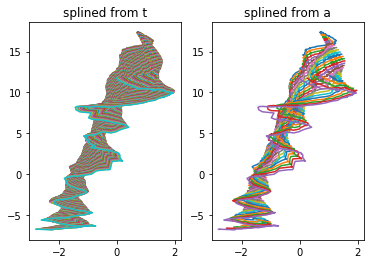

In [23]:
plt.subplot(1,2,1)
plt.plot(archerfish.xt,archerfish.zt)
plt.title('splined from t')

plt.subplot(1,2,2)
plt.plot(archerfish.xa,archerfish.za)
plt.title('splined from a')

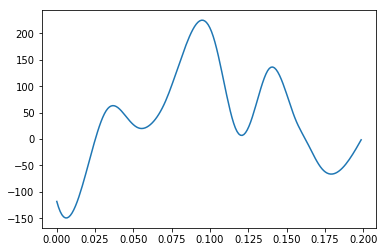

In [41]:
plt.plot(archerfish.t, np.transpose(archerfish.dxdt)[-1])

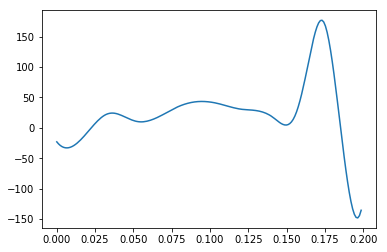

In [42]:
plt.plot(archerfish.t, np.transpose(archerfish.dzdt)[-1])

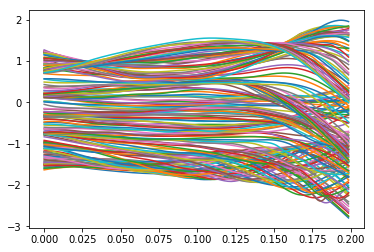

In [66]:
plt.plot(archerfish.t,np.transpose(archerfish.xt))

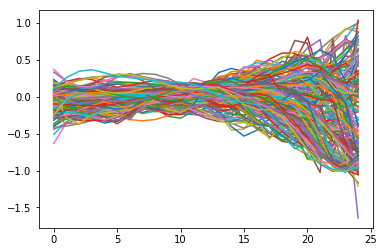

In [37]:
plt.plot(np.transpose(archerfish.dxda))

In [39]:
# atArray = np.transpose(archerfish.xt)

# fig, ax = plt.subplots()
# im = ax.imshow(atArray)

# # We want to show all ticks...
# #ax.set_xticks(np.arange(len(archerfish.xt)))
# #ax.set_yticks(np.arange(len(archerfish.xt)))
# # ... and label them with the respective list entries
# #ax.set_xticklabels(farmers)
# #ax.set_yticklabels(vegetables)

# # Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

# # Loop over data dimensions and create text annotations.
# for i in range(len(archerfish.xt)):
#     for j in range(len(archerfish.xt)):
#         text = ax.text(j, i, atArray[i, j],
#                        ha="center", va="center", color="w")

# ax.set_title("Heat Map ")
# fig.tight_layout()
# plt.show()

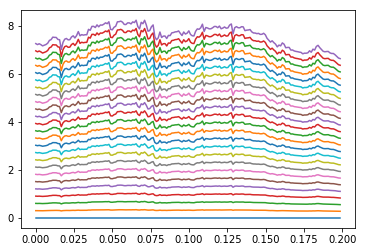

In [49]:
plt.plot(archerfish.t,archerfish.anew)

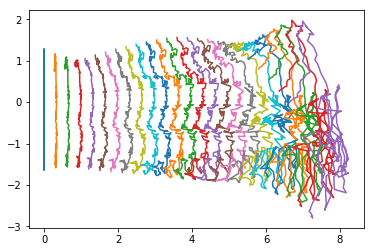

In [68]:
plt.plot(archerfish.anew,archerfish.xa)

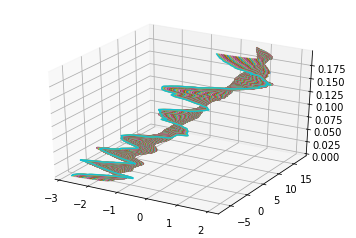

In [40]:
fig = plt.figure()
ax = fig.gca(projection='3d')

z = archerfish.t
x = archerfish.xt
y = archerfish.zt
ax.plot(x, y, z)

plt.show()


In [72]:
print(archerfish.w)

[[ -28.05803755   20.24385753   -6.27487386 ...   24.19170007
     6.91362464  -16.08729333]
 [ -25.60062864   18.75112627   -9.96947945 ...   22.2883807
     8.95282903  -20.50229658]
 [  -4.01766377   11.19046431  -15.97378097 ...   19.63098048
    11.34735746  -31.25269333]
 ...
 [ 125.46797289  -16.31243734   38.69385344 ...  -94.96959126
  -152.93089282  120.48247399]
 [ 117.1794445   -11.9367848    37.60337338 ... -101.80839016
  -170.64799292  134.8625064 ]
 [ 114.76937386   -7.87479492   36.69051588 ... -102.00185633
  -170.04328693  129.6262794 ]]


In [78]:
print(np.transpose(archerfish.w)[-1])

[-1.60872933e+01 -2.05022966e+01 -3.12526933e+01 -1.66313413e+01
 -2.83502273e+01 -2.98799585e+01 -7.73857241e+01 -7.45350984e+01
 -6.61148905e+01 -3.78107855e+01 -2.44384852e+01 -4.14851942e+01
 -4.57942968e+01 -1.32393460e+01 -2.61963715e+01 -6.90883056e+01
 -4.01828528e+01 -2.14791088e+01 -2.06076113e+01 -1.87253137e+01
 -1.80983566e+01 -1.46232056e+01 -8.85296115e-01  7.46029889e+00
  9.72692162e+00  2.92137266e+01 -1.41278039e+00 -5.51010727e+00
 -3.81186436e+00  2.75466011e+01  7.88016121e+00  3.61032039e+01
  1.55229655e+01  2.42680239e+00  1.29088326e+01  5.81830731e+01
  5.95402738e+01  5.21186209e+01  5.22007223e+01  4.82738956e+01
  4.95159835e+01  4.57950949e+01  4.11124159e+01  3.82254966e+01
  1.07341658e+01  1.32721328e+01  1.48315835e+01  7.96837145e+00
  7.33037927e+00  8.73186334e+00  3.09084745e+00  9.22520480e+00
  2.32126496e+01  2.42210885e+01  2.79762195e+01  2.98561002e+01
  2.98121296e+01  3.23926389e+01  3.72155965e+01  4.46587492e+01
  2.53297854e+01  3.34934

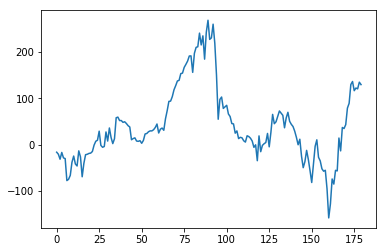

In [79]:
plt.plot(np.transpose(archerfish.w)[-1])

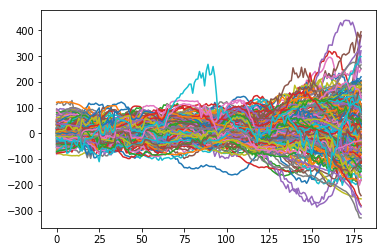

In [135]:
plt.plot(archerfish.w)

In [75]:
print(archerfish.xa)

[[-1.5116246  -1.50801371 -1.50533744 ... -2.71924543 -2.75754002
  -2.79642619]
 [-1.50580783 -1.50075767 -1.49679955 ... -2.67700485 -2.71461759
  -2.75291694]
 [-1.49541528 -1.49519092 -1.49547752 ... -2.68539735 -2.72102859
  -2.75601923]
 ...
 [ 0.706376    0.70934323  0.71283194 ...  0.1327107   0.10000528
   0.06816326]
 [ 0.74895455  0.75361138  0.75853826 ...  0.09071878  0.05487412
   0.01953532]
 [ 0.71940548  0.7238202   0.72910049 ...  0.06550489  0.02963274
  -0.00594203]]


In [76]:
print(archerfish.xt)

[[-1.5116246  -1.50801371 -1.50533744 ... -2.71924543 -2.75754002
  -2.79642619]
 [-1.50580783 -1.50075767 -1.49679955 ... -2.67700485 -2.71461759
  -2.75291694]
 [-1.49541528 -1.49519092 -1.49547752 ... -2.68539735 -2.72102859
  -2.75601923]
 ...
 [ 0.706376    0.70934323  0.71283194 ...  0.1327107   0.10000528
   0.06816326]
 [ 0.74895455  0.75361138  0.75853826 ...  0.09071878  0.05487412
   0.01953532]
 [ 0.71940548  0.7238202   0.72910049 ...  0.06550489  0.02963274
  -0.00594203]]


In [81]:
print(len(archerfish.s))

180


In [90]:
print(archerfish.p)

[ 2.48920359e+03  3.71773426e+03  6.62136546e+03  3.25063866e+03
  6.41363058e+03  6.96168128e+03  2.38887980e+04  2.26352414e+04
  1.91577175e+04  9.37629927e+03  4.99922477e+03  9.08747060e+03
  9.99839723e+03  1.91186976e+03  3.28319137e+03 -3.24017455e+03
 -7.53617858e+02  3.38100597e+00 -2.06986083e+02 -4.95856141e+02
 -6.24196473e+02 -3.90204792e+02 -2.56472361e+01  2.43063166e+02
  4.56153950e+02  9.71437981e+02 -1.12060141e+02 -4.38697048e+02
 -3.56653216e+02  4.10293499e+03  1.05554485e+03  5.61508202e+03
  2.29243271e+03  3.08761637e+02  2.23462082e+03  9.06293442e+02
  9.70916143e+02  6.56609601e+02  9.18279613e+02  2.49307775e+02
  5.08762668e+02 -3.28680374e+02  1.20168358e+03 -1.07421167e+03
  9.17598421e+02  1.06787999e+03  1.07748433e+03  5.34178632e+02
  4.58453219e+02  5.41396481e+02  1.70724743e+02  6.39502444e+02
  8.12369833e+02  1.01452754e+03  7.51682634e+02  1.06215902e+03
  1.97042499e+03  2.37630985e+03  2.94549273e+03  2.66019233e+03
  3.32842180e+03  4.82443

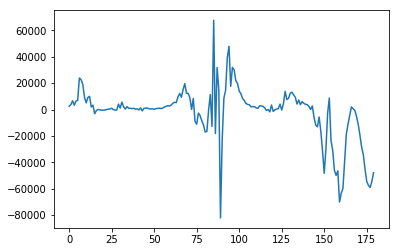

In [91]:
plt.plot(archerfish.p)

In [92]:
print(archerfish.dzda)

[[-1.00955129 -1.00761934 -1.00578897 ... -0.37012566 -0.34797599
  -0.32464624]
 [-1.00481995 -1.0035177  -1.00228504 ... -0.40007595 -0.37806454
  -0.35464845]
 [-1.00212518 -1.00133604 -1.00060099 ... -0.39650034 -0.40107859
  -0.40736959]
 ...
 [-1.00472805 -1.00184695 -0.99906829 ... -0.25515878 -0.2554136
  -0.25671879]
 [-0.99424563 -0.99299094 -0.99174222 ... -0.13504214 -0.15909831
  -0.18678875]
 [-1.01487214 -1.00703101 -0.99957541 ... -0.04329393 -0.02485323
  -0.00657744]]


In [93]:
print(archerfish.w)

[[ -28.05803755   20.24385753   -6.27487386 ...   24.19170007
     6.91362464  -16.08729333]
 [ -25.60062864   18.75112627   -9.96947945 ...   22.2883807
     8.95282903  -20.50229658]
 [  -4.01766377   11.19046431  -15.97378097 ...   19.63098048
    11.34735746  -31.25269333]
 ...
 [ 125.46797289  -16.31243734   38.69385344 ...  -94.96959126
  -152.93089282  120.48247399]
 [ 117.1794445   -11.9367848    37.60337338 ... -101.80839016
  -170.64799292  134.8625064 ]
 [ 114.76937386   -7.87479492   36.69051588 ... -102.00185633
  -170.04328693  129.6262794 ]]


In [95]:
print(archerfish.dzda*archerfish.w*archerfish.m)

[[ 141.9550005  -102.22444935   31.62837505 ...  -44.87253474
   -12.0564678    26.17329355]
 [ 128.91513028  -94.30124112   50.07589799 ...  -44.68749095
   -16.96255445   36.43892837]
 [  20.17718497  -56.1555863    80.10021206 ...  -39.00771979
   -22.80810659   63.80299599]
 ...
 [-631.75170149   81.90025432 -193.73236153 ...  121.43953412
   195.75111638 -155.00529933]
 [-583.86190159   59.40153463 -186.8919626  ...   68.89978891
   136.06040298 -126.24290154]
 [-583.71701899   39.74176133 -183.79529667 ...   22.13095144
    21.17909008   -4.27282212]]


In [102]:
print(len(archerfish.anew[0]))

180


In [108]:
ysimps = (-archerfish.dzda)*archerfish.w*archerfish.m
simpin = simps(ysimps, archerfish.anew)

In [109]:
print(simpin)

[300.53597763 315.64781235 302.41344106 308.13926254 285.68357806
 321.89076092 289.33764947 298.02613357 275.08212699 270.40521021
 241.97855693 255.4089723  216.18444893 196.44302303 221.8993717
 169.86332541 244.61445335 269.3595702  318.23572725 322.96669935
 350.47868951 361.37550058 361.60616739 323.07606219 302.85663182
 321.93229688 343.8144361  381.8953139  354.14059752 363.24629119
 312.01014367 210.65559939 254.05888725 200.92649373 226.83795568
 191.30094691 232.73243437 228.62176728 261.39644197 220.42325387
 226.3125731  228.37806557 239.6313898  270.77146257 232.71960036
 264.90676342 300.23018076 277.93778672 277.73408692 286.18130913
 274.81948699 277.60903513 249.22653426 272.61190525 264.56296866
 234.41121265 250.05836862 274.0630564  313.72963624 331.08915038
 326.5271949  401.92109147 420.17592201 438.11853572 505.51476613
 550.65203885 570.55933474 631.60270574 637.19142684 642.65384179
 608.82759846 576.58870888 624.46292578 633.79225102 568.36883379
 591.433455

In [116]:
simpedspline = InterpolatedUnivariateSpline(archerfish.t,simpin)
simpeddev = simpedspline.derivative()
print(simpeddev(archerfish.t))

[ 52776.47067297 -12351.11770318   1702.22563107 -14751.16266385
  12086.57906767   3571.05822912 -16494.94331555  -2090.27782393
 -13672.38450984 -17871.3283503   -4311.41035986  -5413.40294716
 -43748.78325354  21041.10552106 -24969.90162964   7001.48038713
  58356.09266046  28482.91869101  26688.64850439   9646.62013041
  21868.01222011   6688.90188043 -18549.3551954  -36003.47675074
   3780.73364269  17789.28458812  35758.89632818   1237.33824124
 -12799.70492711   -441.28261462 -99301.25609802 -14760.96811747
   1720.111218   -18414.35692369  -1632.76884826  -1069.55907909
  21842.02866091  14568.52651424  -2645.84391975 -26143.29518189
  12397.75743223  -1948.24346343  31392.01832921  -9043.08120619
 -13900.20551482  48793.36501601   1187.77356236 -18325.47736
  11313.88225508  -4650.26138231   -590.13383603 -16157.5113763
  -3949.96316257  18451.60761015 -28406.64459198  -8070.14438892
  21485.60043289  29294.88793686  33419.35489673  -8847.72921321
  36559.55832256  54047.17455

In [121]:
print(archerfish.p)

[-5.02872671e+04  1.60688520e+04  4.91913983e+03  1.80018013e+04
 -5.67294849e+03  3.39062305e+03  4.03837414e+04  2.47255192e+04
  3.28301020e+04  2.72476276e+04  9.31063513e+03  1.45008736e+04
  5.37471805e+04 -1.91292358e+04  2.82530930e+04 -1.02416549e+04
 -5.91097105e+04 -2.84795377e+04 -2.68956346e+04 -1.01424763e+04
 -2.24922087e+04 -7.07910667e+03  1.85237080e+04  3.62465399e+04
 -3.32457969e+03 -1.68178466e+04 -3.58709565e+04 -1.67603529e+03
  1.24430517e+04  4.54421760e+03  1.00356801e+05  2.03760501e+04
  5.72321490e+02  1.87231186e+04  3.86738967e+03  1.97585252e+03
 -2.08711125e+04 -1.39119169e+04  3.56412353e+03  2.63926030e+04
 -1.18889948e+04  1.61956309e+03 -3.01903347e+04  7.96886953e+03
  1.48178039e+04 -4.77254850e+04 -1.10289228e+02  1.88596560e+04
 -1.08554290e+04  5.19165786e+03  7.60858579e+02  1.67970138e+04
  4.76233300e+03 -1.74370801e+04  2.91583272e+04  9.13230341e+03
 -1.95151754e+04 -2.69185781e+04 -3.04738622e+04  1.15079215e+04
 -3.32311365e+04 -4.92227

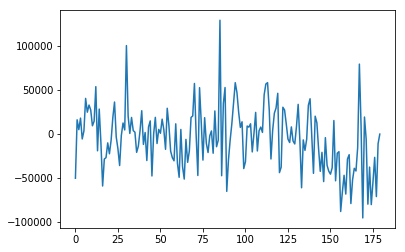

In [137]:
plt.plot(archerfish.p)

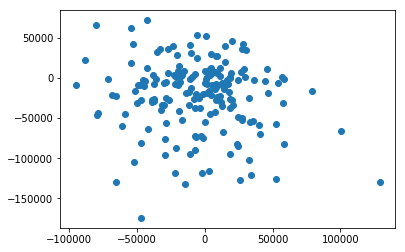

In [148]:
plt.scatter(archerfish.p,archerfish.q)